# Gradient Boosting Course
## Course 2: Fundamentals of Gradient Boosting


## Outline
- Decision Trees
- Forests of Decision Trees
- Gradient Boosted Trees

## Decision Trees

- "Similarity Principle" - two values of x that are "similar" should have similar predictions about y.
- For numeric predictors, similarity means that $|x_1 - x_2|$ is small
- For categorical predictors, less clear how to define similarity (more about this later)


### Example: Linear Regression
- Consider linear regression on a single variable.
- Model: $y = \alpha + \beta x$
- Similarity comes from the fact that the function is continuous
- Lines give an easily specified set of reasonable functions, that are governed by few (two) parameters

- Q: What is another class of functions that can be specified with few parameters?
- A: There are many, but in particular: step functions!
    - $f(x) = a \mbox{ if } x\leq c$
    - $f(x) = b \mbox{ if } x> c$

### Fitting a step function
- In linear regression, there is matrix algebra that lets you find the best $\alpha, \beta$ to minimze the mean squared error on a data set.
- For a step function, you just try every possible "split" $c$ and then choose $a$ and $b$ to be the means of the points on each side of the split respectively

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Create some data - step change at x = 7
np.random.seed(0)
npts=25
xvec = np.round(np.random.uniform(0,10, size=25), decimals = 2)
yvec = 2*(xvec<=7) + 6*(xvec>7) + np.round(np.random.normal(0,1,size=25), decimals=2)

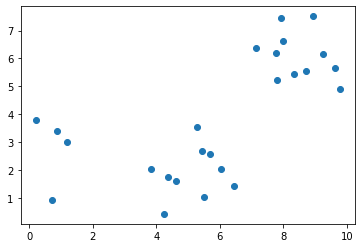

In [3]:
plt.scatter(xvec, yvec);

In [4]:
# Quick loop to try all split values
# Fit the mean on the left and mean on the right
# calculate the total mean-squared error

print('splt', 'mn_l','mn_r', 'mse') 

for split_val in np.unique(xvec)[:-1]:
    a_val = np.mean(yvec[xvec<=split_val])
    b_val = np.mean(yvec[xvec>split_val])
    error_1 = (yvec[xvec<=split_val] - a_val)**2
    error_2 = (yvec[xvec>split_val] - b_val)**2
    error = np.mean(np.concatenate((error_1, error_2)))
    print(split_val, np.round(a_val,decimals=3), 
          np.round(b_val, decimals=3), np.round(error,decimals=3))

splt mn_l mn_r mse
0.2 3.79 3.898 4.675
0.71 2.355 4.028 4.469
0.87 2.703 4.056 4.482
1.18 2.778 4.107 4.438
3.83 2.632 4.21 4.277
4.24 2.267 4.408 3.839
4.38 2.194 4.555 3.552
4.61 2.121 4.728 3.196
5.29 2.279 4.802 3.208
5.45 2.319 4.944 3.022
5.49 2.203 5.223 2.428
5.68 2.233 5.427 2.13
6.03 2.218 5.71 1.631
6.46 2.161 6.099 0.855
7.15 2.443 6.071 1.516
7.78 2.676 6.059 2.039
7.81 2.826 6.164 2.251
7.92 3.083 5.979 2.985
7.99 3.271 5.868 3.444
8.33 3.379 5.956 3.612
8.7 3.481 6.06 3.782
8.92 3.665 5.577 4.289
9.26 3.773 5.29 4.506
9.64 3.852 4.91 4.632


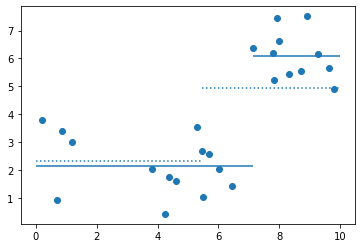

In [5]:
# Plot best split found (and another lesser split as dotted line)
plt.scatter(xvec, yvec)
plt.hlines(y=2.16, xmin=0, xmax=7.15)
plt.hlines(y=6.09, xmin=7.15, xmax=10)
plt.hlines(y=2.319, xmin=0, xmax=5.45, linestyles='dotted')
plt.hlines(y=4.944, xmin=5.45, xmax=10, linestyles='dotted')

### Question 1: What about when I want multiple steps?
- Let $m$ be number of different x values
- To check every division into two steps takes $m$ evaluations
- To check every division into three steps takes $m^2$ evaluations
- etc....

### Question: What about when I have multiple variables?
- Again, to find the best step function with (for example) 8 leaves and 4 variables would be very difficult

### Solution: Use a *greedy* approach
- Find the best split across all variables
- Repeat process on each side of split separately (using only data on that side of split)
- Stop according to some rules
- Note: This does not find the best possible tree!  For example, it may be that you get the best tree by choosing a "not-so-good" split first, but it enables better splits below.



In [6]:
# Create new data - jumps at x=2,4,6, step heights are 3,2,4,9
np.random.seed(0)
npts=100
xvec = np.round(np.random.uniform(0,10, size=npts), decimals = 2)
yvec = 3- 1*(xvec>2) + 2* (xvec>4) + 5* (xvec>6) + np.round(np.random.normal(0,.5,size=npts), decimals=2)

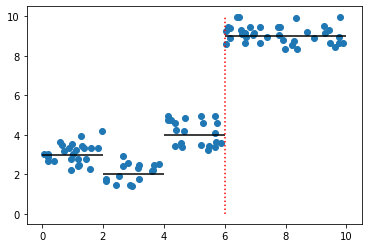

In [7]:
plt.scatter(xvec, yvec)
plt.hlines(y=3, xmin=0, xmax=2, color='black')
plt.hlines(y=2, xmin=2, xmax=4, color='black')
plt.hlines(y=4, xmin=4, xmax=6, color='black')
plt.hlines(y=9, xmin=6, xmax=10, color='black')
plt.vlines(x=6, ymin=0, ymax=10, color='red', linestyle='dotted')

In [8]:
# Quick loop to try all split values
# Fit the mean on the left and mean on the right
# calculate the total mean-squared error

print('splt', 'mn_l','mn_r', 'mse') 

for split_val in np.unique(xvec)[:-1]:
    a_val = np.mean(yvec[xvec<=split_val])
    b_val = np.mean(yvec[xvec>split_val])
    error_1 = (yvec[xvec<=split_val] - a_val)**2
    error_2 = (yvec[xvec>split_val] - b_val)**2
    error = np.mean(np.concatenate((error_1, error_2)))
    print(split_val, np.round(a_val,decimals=3), 
          np.round(b_val, decimals=3), np.round(error,decimals=3))

splt mn_l mn_r mse
0.05 3.01 5.45 8.792
0.19 2.94 5.477 8.725
0.2 2.887 5.532 8.583
0.39 2.844 5.562 8.5
0.6 2.98 5.582 8.469
0.64 3.05 5.605 8.426
0.71 3.066 5.631 8.367
0.87 3.098 5.656 8.315
0.94 3.011 5.694 8.203
0.96 2.989 5.727 8.117
0.97 3.037 5.752 8.073
1.02 3.035 5.783 7.997
1.1 3.049 5.813 7.931
1.18 3.006 5.853 7.818
1.19 2.992 5.889 7.723
1.2 2.961 5.931 7.606
1.29 3.014 5.955 7.574
1.32 3.036 5.986 7.511
1.38 3.05 6.02 7.44
1.43 3.038 6.061 7.335
1.59 3.002 6.109 7.194
1.61 3.017 6.145 7.117
1.83 3.03 6.182 7.039
1.97 3.076 6.209 7.011
2.09 3.023 6.27 6.822
2.1 2.977 6.332 6.633
2.44 2.922 6.399 6.413
2.53 2.887 6.463 6.218
2.65 2.873 6.573 5.924
2.83 2.863 6.632 5.761
2.89 2.822 6.709 5.511
2.96 2.781 6.788 5.246
3.15 2.768 6.857 5.047
3.18 2.74 6.937 4.793
3.19 2.732 7.008 4.59
3.6 2.718 7.085 4.357
3.64 2.705 7.166 4.117
3.69 2.699 7.244 3.893
3.83 2.695 7.324 3.668
4.14 2.749 7.364 3.661
4.15 2.795 7.411 3.629
4.24 2.839 7.458 3.594
4.37 2.853 7.531 3.434
4.38 2.89 7.

### Parameters for decision tree algorithm
(I put the sklearn names below, other packages may vary in their naming)
- `max_depth`: don't split further when you've reached a certain depth
- `min_samples_split`: don't split if you have few data points at the node
- `min_samples_leaf`: don't split if it creates a node with few data points
- `criterion`: how to evaluate how "good" a split is.  Typically use mean_squared_error for regression and entropy for classification (though "gini" is also used as a quicker approximation to entropy).  In practice, the distinction between entropy and gini is usually not that important.

### Implementation details:
- What about missing values?
- What about categorical variables?

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


## Forests of Decision Trees (Random Forests): Motivating thought experiment
- In practice, it is rare to use a single decision tree as your model (though it does happen!)
- Imagine you build a decision tree, and at the root it is very close between two different variables as to which is the best to split on.
- The "best" tree $T_1$ gives a reasonable model. However, you also check what tree you would have built if you used the second-best split (at the root) (call it $T_2$).
- Then you average the predictions of $T_1$ and $T_2$ and find it does better than either tree alone
- You would like to expand this idea and build 1000 trees that are all "pretty good" and also different from one another.
- IDEA: inject some randomness into tree building process...

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Injecting Randomness
When building a forest, one builds many decision trees independently.  Since the decision tree algorithm is deterministic, if you run it over and over again on the same dataset, you will just get the same tree over and over.

<br>
<br>
<br>
<br>
<br>

#### Randomness 1
Use different datasets each time.  Specifically, take a random sample of your data (how big? with or without replacement?).  This is called "bagging".  This means you can get different trees because the data looks different.
- This helps, but the trees end up still being pretty similar most of the time

<br>
<br>
<br>
<br>
<br>
<br>

#### Randomness 2
Only evaluate a subset of the predictors at each node.  For example, if you have 10 predictors, randomly choose 3 and only consider those.  This means the root splits (and subsequent splits) will be quite different from tree to tree.

Since each tree is a completely independent trial of this process, it is straightforward to parallelize.

### Parameters for Random Forest (in addition to Decision Tree)
- all the tree-specific parameters above
- `n_estimators`: Number of trees to fit
- `max_features`: How many (or what percentage) of the features to try at each node.

## Random Forest / Decision Trees in Action

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss, r2_score

In [10]:
df_house = pd.read_csv('../GBIP/data/Ames_Housing_Data.tsv', delimiter='\t')
df_house = df_house.loc[df_house['Gr Liv Area']<=4000,:]
df_house['Garage Area'].fillna(0, inplace=True)
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   int64  
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2925 non-null   object 
 9   Land Contour     2925 non-null   object 
 10  Utilities        2925 non-null   object 
 11  Lot Config       2925 non-null   object 
 12  Land Slope       2925 non-null   object 
 13  Neighborhood     2925 non-null   object 
 14  Condition 1      2925 non-null   object 
 15  Condition 2      2925 non-null   object 
 16  Bldg Type        2925 non-null   object 
 17  House Style   

In [11]:
# Choose a few features
features = [
 'Year Built',
 'Gr Liv Area',
 'Bedroom AbvGr', 
    'Lot Area']

In [12]:
# Set up our dataframes
X = df_house.iloc[:,:-1]  # everything except Sale Price
y = df_house.SalePrice 

X_train_full, X_test, y_train, y_test = train_test_split(X,y,test_size = 400, random_state=0)

# create data sets of just the smaller subset of features
X_train_0 = X_train_full.loc[:, features]
X_test_0 = X_test.loc[:, features]

In [13]:
# Create / train Random Forest
rf0 = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=2, max_features=2)
rf0.fit(X_train_0, y_train)

RandomForestRegressor(max_depth=2, max_features=2, n_jobs=-1)

In [14]:
(rf0.estimators_[0].tree_.children_left,
rf0.estimators_[0].tree_.children_right,
rf0.estimators_[0].tree_.value.reshape(-1),
rf0.estimators_[0].tree_.n_node_samples,
rf0.estimators_[0].tree_.feature,
rf0.estimators_[0].tree_.threshold
)

(array([ 1,  2, -1, -1,  5, -1, -1], dtype=int64),
 array([ 4,  3, -1, -1,  6, -1, -1], dtype=int64),
 array([181418.28633663, 144147.82512953, 133991.08080808, 195010.58754864,
        240078.42099898, 213743.62169312, 328563.34666667]),
 array([1606,  975,  812,  163,  631,  488,  143], dtype=int64),
 array([ 0,  3, -2, -2,  1, -2, -2], dtype=int64),
 array([ 1.98450e+03,  1.23795e+04, -2.00000e+00, -2.00000e+00,
         1.96900e+03, -2.00000e+00, -2.00000e+00]))

In [15]:
tr = rf0.estimators_[0].tree_
for i in range(7):
    print(f"node number: {i}")
    print(f"feature used: {features[tr.feature[i]]}")
    print(f"threshold: {tr.threshold[i]}")
    print(f"left child: {tr.children_left[i]}")
    print(f"right child: {tr.children_right[i]}")
    print(f"num data pts: {tr.n_node_samples[i]}")
    print(f"value at node: {tr.value[i][0][0]}")
    print("\n")

node number: 0
feature used: Year Built
threshold: 1984.5
left child: 1
right child: 4
num data pts: 1606
value at node: 181418.28633663367


node number: 1
feature used: Lot Area
threshold: 12379.5
left child: 2
right child: 3
num data pts: 975
value at node: 144147.82512953368


node number: 2
feature used: Bedroom AbvGr
threshold: -2.0
left child: -1
right child: -1
num data pts: 812
value at node: 133991.08080808082


node number: 3
feature used: Bedroom AbvGr
threshold: -2.0
left child: -1
right child: -1
num data pts: 163
value at node: 195010.58754863814


node number: 4
feature used: Gr Liv Area
threshold: 1969.0
left child: 5
right child: 6
num data pts: 631
value at node: 240078.42099898064


node number: 5
feature used: Bedroom AbvGr
threshold: -2.0
left child: -1
right child: -1
num data pts: 488
value at node: 213743.6216931217


node number: 6
feature used: Bedroom AbvGr
threshold: -2.0
left child: -1
right child: -1
num data pts: 143
value at node: 328563.3466666667




In [16]:
tr = rf0.estimators_[5].tree_
for i in range(7):
    print(f"node number: {i}")
    print(f"feature used: {features[tr.feature[i]]}")
    print(f"threshold: {tr.threshold[i]}")
    print(f"left child: {tr.children_left[i]}")
    print(f"right child: {tr.children_right[i]}")
    print(f"num data pts: {tr.n_node_samples[i]}")
    print(f"value at node: {tr.value[i][0][0]}")
    print("\n")

node number: 0
feature used: Gr Liv Area
threshold: 1664.5
left child: 1
right child: 4
num data pts: 1589
value at node: 179074.81188118813


node number: 1
feature used: Gr Liv Area
threshold: 1323.0
left child: 2
right child: 3
num data pts: 1104
value at node: 147996.02919290212


node number: 2
feature used: Bedroom AbvGr
threshold: -2.0
left child: -1
right child: -1
num data pts: 633
value at node: 126546.20645792564


node number: 3
feature used: Bedroom AbvGr
threshold: -2.0
left child: -1
right child: -1
num data pts: 471
value at node: 178232.8827586207


node number: 4
feature used: Year Built
threshold: 1980.5
left child: 5
right child: 6
num data pts: 485
value at node: 248862.2583547558


node number: 5
feature used: Bedroom AbvGr
threshold: -2.0
left child: -1
right child: -1
num data pts: 190
value at node: 188829.038585209


node number: 6
feature used: Bedroom AbvGr
threshold: -2.0
left child: -1
right child: -1
num data pts: 295
value at node: 288841.55460385437




## Gradient Boosting: History and Terminology

- Generally, when people refer to "Gradient Boosting" what they really mean is "Gradient Boosted Decision Trees"
- "Boosting" in general, originally referred to a process where you fit a model, and then gave more weight to the examples in the training data that it got wrong, refit the model, and then added the new model to the previous one.  
- AdaBoost (Freund and Schapire) was an early example of this, and using trees as the base learner was shown to be quite effective

- Later, it was shown that AdaBoost was equivalent to fitting the base learner to the *gradient* of a particular loss function (exponential). 

- The idea was then generalized to any particular loss function, and referred to as *gradient boosting*.  Additionally, other loss functions were shown to be better in practice than the exponential loss.

- Though the idea can apply to any base learner, decision trees have been most effective.  So, what we are learning about today is *gradient boosting with decision trees as the base learner* or *gradient boosted decision trees* (but usually just called *gradient boosting*)

### Gradient boosting: rough pass
- Consider a regression problem.  Suppose you have a model $M_1$ that already performs reasonably well.  But you would like to improve it if possible.
- You use your model to make predictions on the training data and measure the *residuals*: i.e. the difference between the true answer and the prediction.
- Next, you build a decision tree to try and predict the *residuals* given your predictors.  For example you want to find a tree that can distinguish between the cases where your previous model underpredicted vs overpredicted (and also distinguish between a small under/overprediction and a large under/overprediction)
    
- In theory, if your new tree does a great job at predicting the residuals, you can add the result of the tree to the previous model, and voila, you will have a better model.
- In reality we need to be concerned with overfitting: Suppose the residuals are truly random noise.  With enough predictors, you may find an incidental pattern that works on your training data, but is worthless on new cases.
- Therefore, we do a few things to try to prevent this from happening (i.e. to help *regularize*)
- Most importantly, rather than directly add the new model to the old model, we first multiply it by a small fraction (say .1 or even .01 or .001).  We will do this process many times, so it doesn't (generally) hurt to take small steps.
- It also doesn't matter whether we start with a "pretty good" model.  We can start with a "nothing" model (predict 0 for everything) and still iterate through this process.

## Wait! This makes sense, but I still don't get a few things...
- Where does the loss function come in?
- Where does the gradient come in?
- What if I am doing a classification problem?

## Good questions!
- What I just described was specific to regression.
- In fact, it was specific to regression with a mean squared error loss function
- When using mean squared error, the derivative of the loss function is the residual (distance from the true answer) (times a constant of 2)
- $\frac{\partial}{\partial y} (y -y_t)^2 = 2(y-y_t)$
- So fitting a model to the residuals is *equivalent* to fitting a model to the *gradient of the loss function*
- So the notion of predicting small/large under/overpredictions can be thought of as predicting where my loss is increasing/decreasing by a small/large amount.
- The latter notion will even generalize to cases where the loss function has a weirder form.


## Reiteration of Gradient Boosting
- In general, (for classification, regression with any loss function) we take the current model, use it to make predictions on the training data, and then find the *derivative of the loss function* for each point *at its current predicted value*.
- For most loss functions, the gradient is "steeper" the further you are from the right answer, so the idea of predicting the "degree" of over/underprediction is still the right one.

### Example of a regression loss function

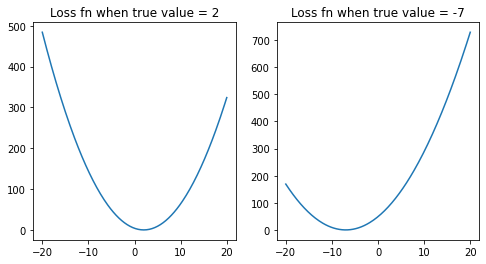

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tvec1 = np.linspace(-20,20,201)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(tvec1, (tvec1-2)**2)
plt.title('Loss fn when true value = 2')

plt.subplot(1,2,2)
plt.plot(tvec1, (tvec1-(-7))**2)
plt.title('Loss fn when true value = -7');

### Example of classification (cross-entropy) loss function

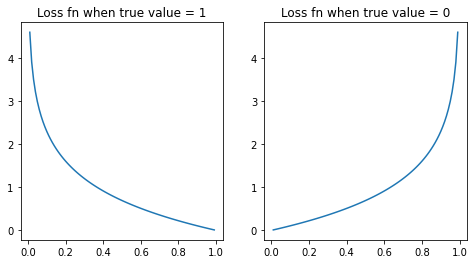

In [18]:
tvec = np.linspace(.01,.99,99)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(tvec, np.log(1/tvec))
plt.title('Loss fn when true value = 1')

plt.subplot(1,2,2)
plt.plot(tvec, np.log(1/(1-tvec)))
plt.title('Loss fn when true value = 0');


## Detailed steps
- Let $M_0$ be the current model
- Let $y_0$ be the current model's predictions on the training set
    - These will be point estimates for regression
    - These will be predicted probabilities for classification
- Let $y_t$ be the true answers (numbers for regression, 0/1 for classification)
- Let $L(y_{true}, y_{pred})$ be the loss function.
- Let $L^{\prime}_{y_{true}}(y_{pred}) = \frac{\partial}{\partial y_{pred}}(L(y_{true}, y_{pred}))$
- Let $z = L^{\prime}_{y_t}(y_0)$ -- i.e. the derivative of the loss function (with respect to the prediction) evaluated at each pair of (true, predicted) values.
- Finally, fit a decision tree that tries to predict $z$ using your predictors $X$.
    - Call the resulting tree $T_1$.
- Let $M_1 = M_0 + \epsilon T_1$ (epsilon is the "learning rate")
- Repeat with $M_1$ as the current model to build $T_2$  (etc. etc.)


### Alternate interpretation: 
- We are doing "gradient descent" by building trees

## Hyperparameters for Gradient Boosting

There are many, many, hyperparameters for the gradient boosting algorithm. However, most of them will have a relatively small impact on performance.  To begin, we will focus on the three most important parameters.

### Three key parameters
- `max_depth` - This determines how deep to build the individual decision trees.  Higher values can capture more complicated relationships but are more likely to overfit.  Smaller values may underfit.

- `learning_rate` - The "step size" as you add new trees to the model.  Taking larger steps means fewer trees are required but may lead to instability.  Smaller steps may require more trees and result in unnecessarily large models.

- `n_estimators` - The number of trees to use to build the model.  Too few trees will underfit the model, whereas too many will overfit.

In addition to being very important, these three parameters are also highly *interactive*, meaning that the best value for one of them is highly dependent on the values chosen for the other two.

Later on, we will discuss how to use *early stopping* to deal with the `learning_rate` and `n_estimators` parameters.

### Other boosting parameters
However, there are other parameters that can yield improvements if tuned appropriately.  These parameters fall into several groups, and different packages handle them (and name them) differently.  We will use the XGBoost names below.


#### Data (row) sampling parameters
How to choose the data for each tree.  Unlike Random Forest, "Standard" boosting just uses the whole data set for each tree.  However, you can choose to sample the data (with or without replacement) to add regularization.
- subsample: the percentage of data points to use for each tree
- replacement:  Whether to choose the sample with or without replacement

#### Feature sampling parameters
The default in gradient boosting is to check every feature at every node.  Since boosting is not relying on having uncorrelated trees, it can still give good results without this randomization.  However, randomly sampling features can help regularize, in addition to speeding up training (it is faster to train if you don't check every column every time). Some packages permit subsampling features per tree, level, *and* node.
- colsample_bynode (_bylevel, _bytree): what fraction of the features to sample at each node (level / tree)

Note: these parameters will be multiplicative.  In other words, if you have 80 features, and set `colsample_bytree` to .5 and `colsample_bynode` to .4, you will effectively be choosing from 16 possible features at each node (80*.5*.4)

#### Split penalty regularization parameters:
When choosing the value on which to split (or whether to split at all), you may use loss functions that take into account model size, or coefficient size.  These parameters govern the tradeoff between fit and model / coefficient size.
- `gamma`: minimum "improvement" required to make a split
- `reg_lambda`, `reg_alpha`: "Shrinkage" of the leaf values of the trees (as in LASSO / Ridge regression)
